# Water System Optimization Experiments Using Genetic Algorithms

This notebook demonstrates the optimization of a water system using genetic algorithms. We'll optimize reservoir release parameters and hydroworks distribution parameters to minimize supply deficits while considering operational constraints.

We will change different parameters of the GA (Genetic Algorithm) like population size, number of generations, crossover probability and mutation probability in order to find the best suited GA parameter set for the Zarafshan River Basin Model.

## Setup

First, let's import the required libraries and set up our parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from water_system import  WaterSystem, SupplyNode, StorageNode, DemandNode, SinkNode, HydroWorks, Edge, WaterSystemVisualizer, MultiGeneticOptimizer
import os
import sys

# Add the project directory to the system path
project_dir = 'C:/Users/giann/water_system_simulation_optimization'
if project_dir not in sys.path:
    sys.path.append(project_dir)

# Import the run sample tests function
from ZRB_system import run_ipynb_optimization
# Import the create seasonal ZRB system function
from ZRB_system import create_seasonal_ZRB_system

## ZRB system

The goal is to optimize annual reservoir and hydrowork parameter for the ZRB system. The following code block shows how the GA is called.

gen	nevals	min        	avg        	std        
0  	5     	1.19236e+12	1.64886e+12	3.39751e+11
1  	2     	1.19236e+12	1.22006e+12	5.53984e+10
2  	4     	1.19236e+12	1.19236e+12	0          
3  	1     	1.13115e+12	1.18012e+12	2.44858e+10
4  	1     	1.13115e+12	1.27815e+12	2.64456e+11
5  	0     	1.13115e+12	1.13115e+12	0          

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 5
Generations: 5
Corss-over probability: 0.5
Mutation probability: 0.2
Final objective value: 1,131,147,606,920 m³


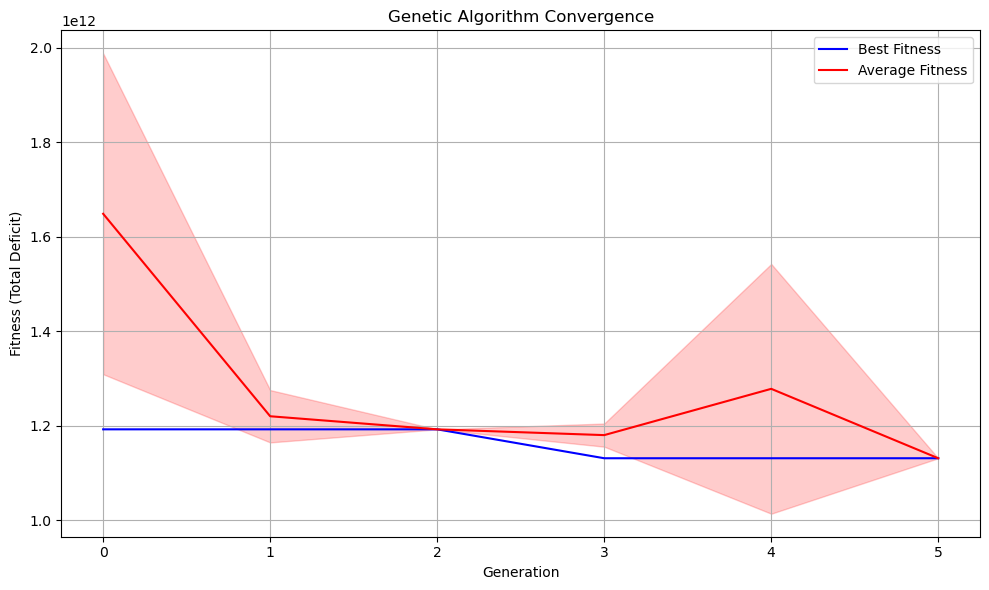

In [2]:
start_year = 2017
start_month = 1
num_time_steps = 12*3
ngen = 5
pop_size = 5
cxpb = 0.5
mutpb = 0.2

optimizer = MultiGeneticOptimizer(
        create_seasonal_ZRB_system,
        start_year=start_year,
        start_month=start_month,
        num_time_steps=num_time_steps,
        ngen=ngen,
        population_size=pop_size,
        cxpb=cxpb,
        mutpb=mutpb
    )

results = optimizer.optimize()

print("\nOptimization Results:")
print("-" * 50)
print(f"Message: {results['message']}")
print(f"Population size: {results['population_size']}")
print(f"Generations: {results['generations']}")
print(f"Corss-over probability: {results['crossover_probability']}")
print(f"Mutation probability: {results['mutation_probability']}")
print(f"Final objective value: {results['objective_value']:,.0f} m³")

optimizer.plot_convergence()

## Analyze Population Size Results

The fil experiment_population_size.csv contains the final objective values determined in a previous experiment/grid search for different populaiton sizes. 

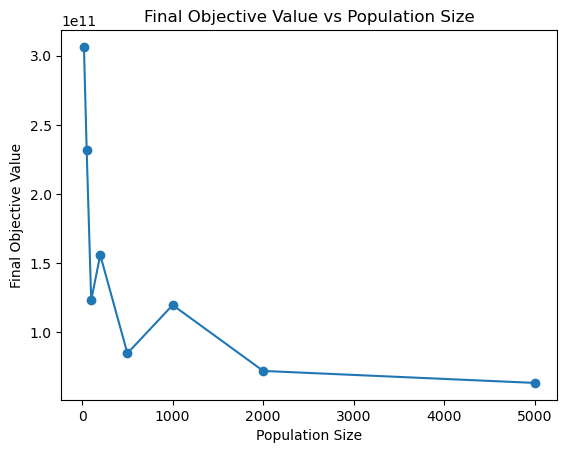

In [3]:
experiment_results = pd.read_csv('./GA_experiments/experiment_population_size.csv')

# plot figure of experiment results plotting Population size versus Final Objective Value.
fig, ax = plt.subplots()
ax.plot(experiment_results['Population Size'], experiment_results['Final Objective Value'], 'o-')
ax.set_xlabel('Population Size')
ax.set_ylabel('Final Objective Value')
ax.set_title('Final Objective Value vs Population Size')
plt.show()

# save figure on disc
fig.savefig('./GA_experiments/experiment_results_pop_size_versus_obj_value.png')

## Optuna

Optuna is a modern hyperparameter optimization framework that automates the process of finding the best parameters for a machine learning model, algorithm, or any other optimization task. It is highly flexible, supports advanced techniques like pruning, and is suitable for a variety of optimization scenarios, including tuning parameters for genetic algorithms (GA).

1. Efficient Sampling:
- Uses techniques like Tree-structured Parzen Estimator (TPE) and other samplers to efficiently explore the search space.
- Focuses on promising areas of the search space instead of blindly testing all combinations.

2. Pruning:
- Dynamically stops unpromising trials (parameter combinations) during execution, saving computation time.

3. Dynamic Search Space:
- Allows the search space to be updated based on intermediate results.

4. Distributed Optimization:
- Scales to multiple machines or processes to perform trials in parallel.

5. Visualization:
- Provides tools to analyze the optimization process, including parameter importance, convergence, and search space exploration.


### Advantages of Optuna
- Automated Tuning: Efficiently finds good parameters without manual intervention.
- Flexibility: Supports dynamic and conditional search spaces.
- Scalability: Easily integrates with parallel and distributed systems.
- Ease of Use: Intuitive API and great visualization tools.


### Let's try...
Keep it small and simple just to see if it works.

In [4]:
import optuna

def objective(trial):
    population = trial.suggest_int('pop_size', 20, 30)
    generations = trial.suggest_int('generations', 5, 6)
    cxpb = trial.suggest_float('cxpb', 0.5, 0.9)
    mutpb = trial.suggest_float('mutpb', 0.1, 0.5)

    optimization_results = run_ipynb_optimization(start_year, start_month, num_time_steps, generations, population, cxpb, mutpb)
    return optimization_results['objective_value']

# Create a study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

# Print the best parameters and fitness value
print("Best Parameters:", study.best_params)
print("Best Objective Value:", study.best_value)


[I 2025-01-16 09:57:42,680] A new study created in memory with name: no-name-c7c3e9bf-a1f3-461f-a48a-5e373e4cd7dd
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min        	avg        	std        
0  	20    	6.98427e+11	1.62368e+12	5.08371e+11
1  	10    	5.63478e+11	1.15928e+12	4.07249e+11
2  	10    	4.79798e+11	8.54063e+11	2.99249e+11
3  	14    	4.2928e+11 	6.04907e+11	1.27683e+11
4  	14    	4.16285e+11	5.42993e+11	1.74961e+11


[I 2025-01-16 09:57:50,725] Trial 0 finished with value: 416284622229.8671 and parameters: {'pop_size': 20, 'generations': 5, 'cxpb': 0.506442560585125, 'mutpb': 0.35900876209849075}. Best is trial 0 with value: 416284622229.8671.


5  	12    	4.16285e+11	4.95842e+11	8.84e+10   

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 20
Generations: 5
Corss-over probability: 0.506442560585125
Mutation probability: 0.35900876209849075
Final objective value: 416,284,622,230 m³


c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min        	avg        	std        
0  	26    	8.09147e+11	1.68805e+12	5.87268e+11
1  	26    	4.61282e+11	1.01744e+12	2.96488e+11
2  	21    	3.60051e+11	8.19078e+11	4.04382e+11
3  	26    	3.53428e+11	6.13573e+11	2.15049e+11
4  	21    	3.20349e+11	4.88288e+11	1.24725e+11


[I 2025-01-16 09:58:11,255] Trial 1 finished with value: 318605562800.84344 and parameters: {'pop_size': 26, 'generations': 5, 'cxpb': 0.8688614267229333, 'mutpb': 0.3788972539372576}. Best is trial 1 with value: 318605562800.84344.


5  	24    	3.18606e+11	4.69663e+11	1.63383e+11

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 26
Generations: 5
Corss-over probability: 0.8688614267229333
Mutation probability: 0.3788972539372576
Final objective value: 318,605,562,801 m³


c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min        	avg        	std        
0  	21    	7.19265e+11	1.53978e+12	5.14823e+11
1  	20    	6.49745e+11	9.97434e+11	2.96673e+11
2  	15    	5.16731e+11	8.10892e+11	2.29164e+11
3  	20    	4.98205e+11	6.65701e+11	1.37325e+11
4  	20    	4.9719e+11 	5.33847e+11	3.62523e+10
5  	20    	4.9719e+11 	5.68148e+11	1.48436e+11


[I 2025-01-16 09:58:28,133] Trial 2 finished with value: 497190080582.32294 and parameters: {'pop_size': 21, 'generations': 6, 'cxpb': 0.881284620122176, 'mutpb': 0.2814542217787217}. Best is trial 1 with value: 318605562800.84344.


6  	19    	4.9719e+11 	5.12653e+11	3.61259e+10

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 21
Generations: 6
Corss-over probability: 0.881284620122176
Mutation probability: 0.2814542217787217
Final objective value: 497,190,080,582 m³


c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min        	avg        	std        
0  	22    	7.88411e+11	1.52633e+12	5.61469e+11
1  	22    	3.39453e+11	1.07772e+12	3.57257e+11
2  	15    	3.39453e+11	7.09215e+11	2.55862e+11
3  	22    	3.39453e+11	4.38336e+11	9.42227e+10
4  	22    	3.36566e+11	4.88446e+11	2.65007e+11
5  	21    	3.2775e+11 	3.81647e+11	6.40844e+10


[I 2025-01-16 09:58:44,903] Trial 3 finished with value: 317165259617.31714 and parameters: {'pop_size': 22, 'generations': 6, 'cxpb': 0.8873438299503602, 'mutpb': 0.4090332751861996}. Best is trial 3 with value: 317165259617.31714.


6  	22    	3.17165e+11	4.14602e+11	1.59673e+11

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 22
Generations: 6
Corss-over probability: 0.8873438299503602
Mutation probability: 0.4090332751861996
Final objective value: 317,165,259,617 m³


c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min        	avg        	std        
0  	25    	7.35574e+11	1.50018e+12	5.27147e+11
1  	22    	5.09366e+11	8.91926e+11	2.12674e+11
2  	18    	4.47871e+11	7.42262e+11	3.26185e+11
3  	22    	3.97226e+11	6.26908e+11	2.35513e+11
4  	21    	3.93315e+11	5.02026e+11	1.31045e+11
5  	20    	3.93315e+11	4.14384e+11	2.16247e+10


[I 2025-01-16 09:59:01,524] Trial 4 finished with value: 386203471745.1731 and parameters: {'pop_size': 25, 'generations': 6, 'cxpb': 0.8237560514943212, 'mutpb': 0.1704070244802386}. Best is trial 3 with value: 317165259617.31714.


6  	21    	3.86203e+11	4.37102e+11	7.90388e+10

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 25
Generations: 6
Corss-over probability: 0.8237560514943212
Mutation probability: 0.1704070244802386
Final objective value: 386,203,471,745 m³
Best Parameters: {'pop_size': 22, 'generations': 6, 'cxpb': 0.8873438299503602, 'mutpb': 0.4090332751861996}
Best Objective Value: 317165259617.31714


#### Visualize Results

In [7]:
import plotly
from optuna.visualization import plot_optimization_history, plot_param_importances

# Plot optimization history
plot_optimization_history(study).show()

# Plot parameter importances
plot_param_importances(study).show()

### Let's go bigger...

In [9]:
def objective(trial):
    population = trial.suggest_int('pop_size', 50, 1000)
    generations = trial.suggest_int('generations', 20, 100)
    cxpb = trial.suggest_float('cxpb', 0.5, 0.99)
    mutpb = trial.suggest_float('mutpb', 0.1, 0.8)

    optimization_results = run_ipynb_optimization(start_year, start_month, num_time_steps, generations, population, cxpb, mutpb)
    return optimization_results['objective_value']

# Create a study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Print the best parameters and fitness value
print("Best Parameters:", study.best_params)
print("Best Objective Value:", study.best_value)

[I 2025-01-16 10:09:07,180] A new study created in memory with name: no-name-abcb180d-a05b-427a-beb6-543387905af2
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.

c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.



gen	nevals	min        	avg        	std        
0  	788   	3.94401e+11	1.51127e+12	5.42608e+11
1  	603   	3.50143e+11	9.84854e+11	3.71669e+11
2  	592   	3.3992e+11 	7.06442e+11	2.65235e+11
3  	601   	2.28916e+11	5.81402e+11	2.52352e+11
4  	610   	2.17947e+11	5.04305e+11	2.50316e+11
5  	614   	2.20431e+11	4.74763e+11	2.57206e+11
6  	591   	2.20431e+11	4.39201e+11	2.29505e+11
7  	603   	2.08035e+11	4.34027e+11	2.44985e+11
8  	624   	1.89115e+11	4.24446e+11	2.56402e+11
9  	652   	1.94637e+11	3.99679e+11	2.13051e+11
10 	588   	1.81504e+11	3.98527e+11	2.58034e+11
11 	625   	1.85389e+11	3.76583e+11	2.35585e+11
12 	612   	1.76759e+11	3.82214e+11	2.72489e+11
13 	574   	1.76759e+11	3.57148e+11	2.5695e+11 
14 	586   	1.76759e+11	3.55073e+11	2.78703e+11
15 	597   	1.69204e+11	3.29907e+11	2.39157e+11
16 	594   	1.67069e+11	3.46214e+11	2.94378e+11
17 	604   	1.67069e+11	3.41974e+11	2.77953e+11
18 	611   	1.6621e+11 	3.25946e+11	2.54721e+11
19 	578   	1.6162e+11 	3.3941e+11 	2.91784e+11


[I 2025-01-16 10:37:19,947] Trial 0 finished with value: 160878209821.06348 and parameters: {'pop_size': 788, 'generations': 20, 'cxpb': 0.6088413171692455, 'mutpb': 0.4182348222057033}. Best is trial 0 with value: 160878209821.06348.


20 	570   	1.60878e+11	3.2838e+11 	2.80808e+11

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 788
Generations: 20
Corss-over probability: 0.6088413171692455
Mutation probability: 0.4182348222057033
Final objective value: 160,878,209,821 m³


c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.

c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.



gen	nevals	min        	avg        	std        
0  	582   	3.63304e+11	1.51853e+12	5.48045e+11
1  	533   	3.60406e+11	9.80922e+11	3.63256e+11
2  	516   	3.3255e+11 	7.40168e+11	3.14878e+11
3  	499   	2.83401e+11	6.31227e+11	2.85808e+11
4  	506   	3.04801e+11	5.45859e+11	2.45113e+11
5  	524   	2.4033e+11 	5.30177e+11	2.89212e+11
6  	515   	2.65377e+11	4.92648e+11	2.36802e+11
7  	513   	2.54648e+11	4.71885e+11	2.49052e+11
8  	503   	2.3446e+11 	4.59147e+11	2.4385e+11 
9  	511   	2.17486e+11	4.39515e+11	2.23118e+11
10 	530   	2.21365e+11	4.59471e+11	2.50746e+11
11 	509   	2.21365e+11	4.46119e+11	2.67866e+11
12 	509   	2.21365e+11	4.20059e+11	2.62848e+11
13 	505   	1.81621e+11	4.24137e+11	2.63258e+11
14 	524   	1.77409e+11	4.03001e+11	2.5308e+11 
15 	501   	1.69332e+11	4.19697e+11	3.01983e+11
16 	516   	1.71081e+11	4.2225e+11 	3.01103e+11
17 	518   	1.61685e+11	4.03015e+11	2.73548e+11
18 	525   	1.5814e+11 	4.06566e+11	3.01928e+11
19 	519   	1.54259e+11	3.99719e+11	3.06698e+11
20 	512   	1.

[I 2025-01-16 12:14:53,497] Trial 1 finished with value: 73256254357.03944 and parameters: {'pop_size': 582, 'generations': 99, 'cxpb': 0.7438076047760422, 'mutpb': 0.5441221323456923}. Best is trial 1 with value: 73256254357.03944.


99 	511   	7.32563e+10	4.11925e+11	4.22438e+11

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 582
Generations: 99
Corss-over probability: 0.7438076047760422
Mutation probability: 0.5441221323456923
Final objective value: 73,256,254,357 m³


c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.

c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.



gen	nevals	min        	avg        	std        
0  	779   	3.76256e+11	1.53933e+12	5.51527e+11
1  	759   	3.13324e+11	1.02644e+12	3.93082e+11
2  	764   	3.01464e+11	7.65877e+11	3.29984e+11
3  	762   	2.18278e+11	6.31174e+11	2.99784e+11
4  	766   	2.50381e+11	5.48203e+11	2.4243e+11 
5  	765   	2.29277e+11	5.37177e+11	2.70355e+11
6  	767   	2.06506e+11	4.96115e+11	2.18875e+11
7  	764   	2.30789e+11	4.90703e+11	2.37168e+11
8  	771   	2.37208e+11	4.88356e+11	2.48321e+11
9  	765   	2.18758e+11	4.8456e+11 	2.88087e+11
10 	768   	2.04048e+11	4.78934e+11	2.79275e+11
11 	765   	2.15625e+11	4.63856e+11	2.61313e+11
12 	765   	1.96782e+11	4.68029e+11	3.03845e+11
13 	772   	1.9735e+11 	4.46673e+11	2.97894e+11
14 	763   	1.92136e+11	4.67645e+11	3.25643e+11
15 	761   	1.86758e+11	4.42411e+11	2.98239e+11
16 	773   	1.95977e+11	4.47603e+11	3.26801e+11
17 	765   	1.75399e+11	4.28009e+11	2.6877e+11 
18 	767   	1.57501e+11	4.5606e+11 	3.27899e+11
19 	755   	1.60663e+11	4.27234e+11	2.84946e+11
20 	767   	1.

[W 2025-01-16 13:20:34,031] Trial 2 failed with parameters: {'pop_size': 779, 'generations': 70, 'cxpb': 0.9491979113501938, 'mutpb': 0.6450482889253396} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\giann\AppData\Local\Temp\ipykernel_27768\2102796688.py", line 7, in objective
    optimization_results = run_ipynb_optimization(start_year, start_month, num_time_steps, generations, population, cxpb, mutpb)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\giann\water_system_simulation_optimization\ZRB_system.py", line 429, in run_ipynb_optimization
    results = optimizer.optimize()
              ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\giann\water_system_simula

KeyboardInterrupt: 